In [1]:
# prompt: upload csv

from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [2]:
import pandas as pd
data = pd.read_csv("./housing.csv")
data.head(len(data))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
def find_best_kmeans(data, min_k, max_k):
    """  write from here  """

    best_k = min_k
    best_score = -1

    # Iterate over the range of K values
    for k in range(min_k, max_k + 1):
        # Initialize the K-Means model
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
        labels = kmeans.fit_predict(data)

        # Use the data and calculate Silhouette Coefficient for the range of K provided
        # Calculate Silhouette Score
        score = metrics.silhouette_score(data, labels)

        # Update best K if the current score is better
        if score > best_score:
            best_score = score
            best_k = k

    # Return the best K with respect to Silhouette Coefficient
    return f"Best K: {best_k}, Silhouette Score: {best_score}"

In [4]:
input_data_one = int(input("Enter min number: "))
input_data_two = int(input("Enter max number: "))

min_k = input_data_one
max_k = input_data_two

Enter min number: 2
Enter max number: 4


In [5]:
if min_k >= 2 or max_k > min_k:
    data = pd.read_csv("./housing.csv")
    print(find_best_kmeans(data, min_k, max_k))
else:
    print("Invalid input")

Best K: 2, Silhouette Score: 0.7066301364360299


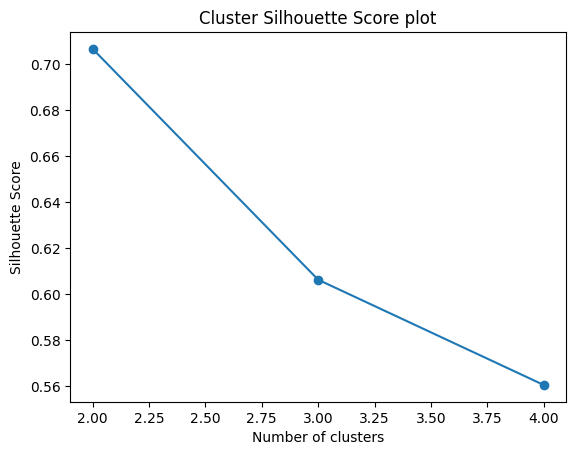

In [6]:
import matplotlib.pyplot as plt
K = []
s_score = []
for k in range(min_k, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
    labels = kmeans.fit_predict(data)
    K.append(k)
    s_score.append(metrics.silhouette_score(data, labels))

plt.plot(K, s_score, marker='o')
plt.title('Cluster Silhouette Score plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()